<a href="https://colab.research.google.com/github/juanignaciogiacobbe/7506R-2C2023-GRUPO15/blob/main/7506R_TP1_GRUPO15_CHP3_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1: Reservas de Hotel</center>
### <center> Grupo número 15</center>
### <center> Giacobbe, Juan Ignacio; Olaran, Sebastian; Ayala, Tomás</center>

#Checkpoint 3: Ensambles

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos las librerías que vamos a utilizar

In [ ]:
#Para análisis de los datos
import pandas as pd
import numpy as np

#Para visualizaciones
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('always')

#Para crear nuestros modelos predictivos
import sklearn as sk
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import DistanceMetric
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score


from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cargamos los archivos csv de datos en dos DataFrames de Pandas(importamos para el dataset de train el dataset que nos quedó como resultado en el checkpoint 2)

In [ ]:
ds_hoteles_test = pd.read_csv('./ds_hoteles_test_checkpoint_3.csv')
ds_hoteles_train = pd.read_csv('./ds_hoteles_train_checkpoint_3.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Breve resumen del dataset
Comenzamos haciendo un breve repaso de las características del dataset a analizar

In [ ]:
ds_hoteles_train.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(8912, 47)

Tenemos un dataset con 60897 registros de reservas de hotel, con 32 columnas correspondientes a variables que describen las reservas(por ejemplo, tenemos una variable que indica la cantidad de adultos que tenemos por reserva).


Veamos los primeros dos registros del dataset

In [ ]:
ds_hoteles_train.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

,Unnamed: 0.1,Unnamed: 0,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable
0,0,0,49,2016,0,37,5,1,2,1,...,0,0,0,1,0,0,1,0,0,0
1,1,1,4,2015,1,44,31,0,1,2,...,0,1,0,0,0,0,1,0,0,0


Veamos las variables que hay en el dataset

In [ ]:
ds_hoteles_train.columns.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Unnamed: 0.1',
 'Unnamed: 0',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'country',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_canceled',
 'hotel_Resort Hotel',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'market_segment_Undefined',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'distribution_channel_Undefined',
 'customer_type_Group',
 'customer_type_Transient',
 'cus

**Descripción de cada campo**



*   hotel(categórica): indica el tipo de hotel en el que se realizó la reserva.
*   lead_time(cualitativa): indica el tiempo desde que se reservó hasta que la persona llegó al hotel.
*   arrival_date_year/month/week_number/day_of_month: indican la fecha de llegada.
*   stays_in_weekend/week_nights: indican las noches que están reservadas.
*   adults, children, babies: indican la cantidad de adultos, niños y bebés respectivamente.
*   meal: indica el tipo de comida que incluye la reserva.
*   country: el país destino de la reserva.
*   market_segment: Segmento del mercado al cual está destinada la reserva.
*   distribution_chanel: Canal de distribución de reservas
*   is_repeated_guest: Indica si el cliente ya ha tenido experiencia reservando.
*   previous_cancellations/ previous_bookings_not_canceled: Indican la cantidad de reservas canceladas y no canceladas de un cliente.
*   reserved_room_type/ assigned_room_type: Tipo de habitación reservada y asignada respectivamente.
*   booking_changes: Cambios que hubieron en el booking.
*   deposit_type: Tipo de depósito que tuvo la reserva.
*   agent: Agente de viajes al que está asignada la reserva.
*   company: Empresa a cargo del booking de la reserva.
*   days_in_waiting_list: Días en que la reserva estuvo en lista de espera.
*   customer_type: Tipo de cliente que tuvo la reserva.
*   adr: Precio promedio de alquiler por día.
*   required_car_parking_spaces: Cantidad de espacios de estacionamiento requeridos.
*   total_of_special_requests: Cantidad de invitados.



---

##Construcción de ensambles

Enumeramos los features que utilizaremos para nuestros modelos predictivos

In [ ]:
features = ['hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
 'adults', 'children', 'babies', 'country', 'meal_Undefined', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO',
'market_segment_Online TA', 'market_segment_Undefined',
 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
  'booking_changes', 'deposit_type_Non Refund', 'deposit_type_Refundable', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
 'total_of_special_requests']

target = 'is_canceled'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Separamos en conjuntos de train y test

In [ ]:
#Separo un set de Evaluacion
from sklearn.model_selection import train_test_split

ds_hoteles_train = ds_hoteles_train.dropna()

#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_hoteles_train.drop([target], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_trabajo_y = ds_hoteles_train[target].copy()


x_train, x_test, y_train, y_test = train_test_split(ds_hoteles_train[features].values,
                                                    ds_hoteles_train[target].values,
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=ds_hoteles_train[target].values) #estratificado para mantener proporcion

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48717
# Datos Prueba: 12180
% Positivos Entrenamiento: 50.459
% Positivos Prueba: 50.460


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###A) Clasificadores KNN

Lo que haremos será optimizar sus hiperparámetros mediante Random Search k-fold Cross Validation

Antes de comenzar, vemos en la documentación oficial de scikit learn que KNN tiene un hiperparámetro que se llama "algoritmo", y básicamente indica el algoritmo a utilizar para encontrar los k vecinos más cercanos. Tenemos tres algoritmos posibles: ball_tree, kd_tree y "fuerza bruta". El problema es que cada algoritmo utiliza un conjunto de las posibles distancias, no todas.

Veamos entonces las distancias admitidas por cada algoritmo

In [ ]:
from sklearn.metrics.pairwise import PAIRWISE_DISTANCE_FUNCTIONS
from sklearn.neighbors import BallTree
from sklearn.neighbors import KDTree

#Métricas Válidas
VALID_METRICS = dict(
    ball_tree=BallTree.valid_metrics,
    kd_tree=KDTree.valid_metrics,
    # The following list comes from the sklearn.metrics.pairwise doc string
    brute=list(PAIRWISE_DISTANCE_FUNCTIONS.keys())
    + [ 'braycurtis','canberra','chebyshev','correlation',
        'cosine','dice','hamming','jaccard','kulsinski',
        'mahalanobis','matching','minkowski','rogerstanimoto',
        'russellrao','seuclidean','sokalmichener','sokalsneath',
        'sqeuclidean','yule','wminkowski',
    ],
)

#Ejemplo
for alg in VALID_METRICS:
    print(f'algoritmo: {alg}')
    print(VALID_METRICS[alg])
    print()

algoritmo: ball_tree
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity', 'seuclidean', 'mahalanobis', 'wminkowski', 'hamming', 'canberra', 'braycurtis', 'matching', 'jaccard', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', 'haversine', 'pyfunc']

algoritmo: kd_tree
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity']

algoritmo: brute
['cityblock', 'cosine', 'euclidean', 'haversine', 'l2', 'l1', 'manhattan', 'precomputed', 'nan_euclidean', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'wminkowski']



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sabiendo esto, vemos que los 3 algoritmos admiten las distancias manhattan, euclideana y chebyshev, y por lo general son las más utilizadas al construir KNNs.

Ahora, utilicemos Random Search k-fold Cross Validation para optimizar los hiperparámetros del modelo.

####Primer modelo KNN

Crearemos un modelo KNN utilizando 10 folds. Creemos que es una buena cantidad teniendo en cuenta nuestra necesidad de mantener un costo computacional bajo, pero sin perder performance a la hora de predecir.

In [ ]:
#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,100),
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=10, scoring='f1', n_iter=10, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array([0.73040244, 0.777184  , 0.6690257 , 0.74757978, 0.74740869,
       0.78669156, 0.69491765, 0.7477069 , 0.75756273, 0.66309074])

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 20, 'metric': 'manhattan', 'algorithm': 'brute'}
0.7866915589604487


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Ahora, usemos este modelo para predecir con el subconjunto de validación. Usaremos el f1 score como métrica.

In [ ]:
#Mejor estimador
knn_classifier_1 = KNeighborsClassifier(n_neighbors= 20, weights= 'distance', metric='manhattan', algorithm='brute')
#Predicción con mejor estimador
knn_classifier_1.fit(x_train, y_train)
y_pred=knn_classifier_1.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.7887975744035745

#####Predicción sobre el dataset test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = knn_classifier_1.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names


1    14467
0    12068
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_knn1.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Este modelo ha obtenido un score de 0.73652 en la competencia de Kaggle. Veamos si podemos mejorar esta métrica generando más modelos.

####Segundo modelo KNN

Además de reducir a la mitad el número de folds con respecto al modelo anterior, hemos decidido aumentar en 10 veces la cantidad de iteraciones. De esta manera esperamos mejorar la performance del modelo con respecto al anterior.

In [ ]:
#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,100),
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 5 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=5, scoring='f1', n_iter=100, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array([0.75513352, 0.78218996, 0.75578016, 0.75366916, 0.77471387,
       0.78147878, 0.6915248 , 0.72446397, 0.67569398, 0.78281773,
       0.72957172, 0.72546457, 0.78167783, 0.66200455, 0.78157629,
       0.78259708, 0.73426803, 0.78167545, 0.7550493 , 0.68754312,
       0.72942662, 0.70815344, 0.74404232, 0.78243582, 0.78284003,
       0.74454328, 0.69243886, 0.74410287, 0.7561692 , 0.68164568,
       0.75361071, 0.71023167, 0.68163018, 0.7028966 , 0.78197546,
       0.75502898, 0.75455055, 0.75558678, 0.78262822, 0.6693847 ,
       0.72366561, 0.66667955, 0.77564232, 0.73200863, 0.74537959,
       0.73258472, 0.78159836, 0.73376703, 0.68439881, 0.68716464,
       0.72432215, 0.77756122, 0.74454049, 0.66231638, 0.67191828,
       0.67259269, 0.68529939, 0.6802104 , 0.70269402, 0.721965  ,
       0.7462963 , 0.75544465, 0.68026793, 0.72712729, 0.68823666,
       0.68636947, 0.75553196, 0.7426937 , 0.75463616, 0.74512977,
       0.77001289, 0.66641046, 0.68286608, 0.78249513, 0.78201

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 33, 'metric': 'manhattan', 'algorithm': 'kd_tree'}
0.78290768243381


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

#####Predicción sobre el dataset test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = best_knn.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names


1    14569
0    11966
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_knn2.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Este modelo ha obtenido un score de 0.7428 en la competencia de Kaggle. Veamos si podemos mejorar esta métrica generando más modelos.

####Tercer modelo KNN

Probaremos creando un modelo KNN utilizando 7 folds, de esta manera tomamos un valor intermedio entre 5 y 10, cuidando siempre el costo computacional sin perder performance.

In [ ]:
params_grid={ 'n_neighbors':range(15,50),
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 7 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=7, scoring='f1', n_iter=100, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array([0.69516792, 0.7464123 , 0.69691047, 0.67319062, 0.78543622,
       0.75613101, 0.72879026, 0.67767827, 0.75683337, 0.75758122,
       0.68402578, 0.75723149, 0.690383  , 0.73127564, 0.74521428,
       0.78483483, 0.78577138, 0.78475729, 0.74515502, 0.78525146,
       0.7291836 , 0.73732573, 0.67247593, 0.78602403, 0.74671215,
       0.78520079, 0.7848768 , 0.74470593, 0.78479525, 0.68679738,
       0.73492858, 0.68641643, 0.75670337, 0.75632021, 0.70183424,
       0.7462998 , 0.78635967, 0.72780184, 0.74766229, 0.69402026,
       0.75605543, 0.67327722, 0.72818229, 0.73477367, 0.73128335,
       0.7329642 , 0.78527457, 0.74596662, 0.74526672, 0.72894965,
       0.67028471, 0.78555787, 0.68357609, 0.72745522, 0.74416801,
       0.6801247 , 0.78481615, 0.75711451, 0.78576789, 0.7851366 ,
       0.68166224, 0.75764135, 0.75652775, 0.74679216, 0.78478211,
       0.74688164, 0.7859032 , 0.74585519, 0.73250751, 0.75681203,
       0.68005356, 0.74618225, 0.68001013, 0.78512188, 0.73156

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 40, 'metric': 'manhattan', 'algorithm': 'ball_tree'}
0.7867817463091813


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.789830238303977

#####Predicción sobre el dataset test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = best_knn.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names


1    14630
0    11905
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreCl

,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_knn3.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Este modelo ha obtenido un score de 0.73519 en la competencia de Kaggle.


Observamos de esta manera en que el segundo KNN que hemos construido ha resultado con la mejor performance de los 3 mostrados en el notebook.

###B) Clasificador SVM

Lo que haremos será crear tres modelos SVM en los que cada uno se construirá con un tipo distinto de kernel. Decidimos usar un modelo con kernel Lineal, otro con kernel Polinomial, y un último modelo con kernel Radial o Gaussiano.

####Normalización de datos

Habiendo investigado sobre el funcionamiento de los Support Vector Machines de la librería scikit learn, hemos encontrado que, para obtener una mejor performance en este tipo de estimadores necesitamos tener conjuntos de datos con desviación estándar unitaria para cada característica. Esto significa en que debemos normalizar los datos que vamos a utilizar para crear el modelo.

Para los SVM, utilizaremos Standard Scaler, y MinMax Scaler, e iremos viendo cómo varían las performances de los modelos.

In [ ]:
#Separo un set de Evaluacion
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_hoteles_train.drop([target], axis='columns', inplace=False)

ds_trabajo_x = ds_trabajo_x.dropna()

#Creo un dataset con la variable target
ds_trabajo_y = ds_hoteles_train[target].copy()
ds_trabajo_y = ds_trabajo_y.dropna()

x_train, x_test, y_train, y_test = train_test_split(ds_hoteles_train[features].values,
                                                    ds_hoteles_train[target].values,
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=ds_hoteles_train[target].values) #estratificado para mantener proporcion

#Armo una version escalada con minmax (media=0 , var=1  )
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax  = min_max_scaler.transform(x_test)

#Armo una version estandarizada
stand_scaler = preprocessing.StandardScaler()
x_train_norm = stand_scaler.fit_transform(x_train)
x_test_norm=stand_scaler.transform(x_test)

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48717
# Datos Prueba: 12180
% Positivos Entrenamiento: 50.459
% Positivos Prueba: 50.460


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Conseguimos de esta forma una normalización de datos para crear nuestros modelos. Ahora, optimicemos los hiperparámetros de los SVM para buscar obtener la mejor performance.

#### Primer modelo SVM(Kernel del tipo Lineal)

#####Optimización de hiperparámetros

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Conjunto de parámetros que quiero usar
params_grid = {'C': [0, 1, 10, 100, 1000], 'kernel': ['linear']}

#Clasificador
base_svm = SVC()

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score)

#GridSearch CV
gridcv = GridSearchCV(estimator=base_svm ,param_grid=params_grid,scoring=scorer_fn)

gridcv.fit(x_train_minmax,y_train)

gridcv.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_

array([       nan, 0.75102215, 0.75609867, 0.75652421, 0.75673928])

In [ ]:
#Mejores hiperparametros
print(gridcv.best_params_)
#Mejor métrica
print(gridcv.best_score_)

{'C': 1000, 'kernel': 'linear'}
0.7567392795961597


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
#Mejor estimador
best_svm=gridcv.best_estimator_

#Predicción con mejor estimador
y_pred=best_svm.predict(x_test_minmax)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.7550442173950374

#####Predicción sobre el dataset test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

x_dataset_test_minmax  = min_max_scaler.transform(ds_test_prediccion[features])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names


In [ ]:
predict = best_svm.predict(x_dataset_test_minmax)

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0    14562
1    11973
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreCl

,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,0
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_svm1.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Este modelo ha obtenido una puntuación de 0.76743 en la competencia de Kaggle. Vemos que este modelo tuvo mejor performance que nuestro mejor KNN, pero creemos que podremos mejorar la performance de los SVM cambiando su kernel.

Probemos a continuación un SVM con un kernel del tipo polinomial.

####Segundo modelo SVM(Kernel del tipo polinomial)

#####Optimización de hiperparámetros

Debido al costo computacional que requiere optmizar los hiperparámetros de un SVM utilizando Grid Search CV, hemos decidido optimizar sus hiperparámetros usando Random Search CV.

In [ ]:
from scipy.stats._levy_stable import uniform
from scipy import stats
from sklearn.svm import SVC

# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1),
             "kernel": ["poly"],
             "degree" : [5, 10], "gamma": [5, 10], "coef0": [5, 15]
             }

#Conjunto de parámetros que quiero usar
params_grid = {'C': stats.uniform(2, 10), "gamma": stats.uniform(0.1,1)} #"degree" : [5, 10], , "coef0": [5, 15]

#Clasificador
base_svm = SVC(kernel = "poly")

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score)

#Random Search CV
rand_search = RandomizedSearchCV(base_svm ,param_distributions = params_grid, scoring=scorer_fn)

rand_search.fit(x_train_minmax,y_train)

rand_search.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.82398595, 0.82446303, 0.82448651, 0.80891801, 0.82328837,
       0.82330536, 0.82439039, 0.82329685, 0.80756563, 0.76722797])

In [ ]:
#Mejores hiperparametros
print(rand_search.best_params_)
#Mejor métrica
print(rand_search.best_score_)

{'C': 11.486168673439304, 'gamma': 0.5416227006820964}
0.8244865106141864


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
svm_poly = SVC(kernel = "poly", C = 11.486168673439304, gamma = 0.5416227006820964)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Mejor estimador
best_svm=rand_search.best_estimator_

#Predicción con mejor estimador
y_pred=best_svm.predict(x_test_minmax)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8308859924104934

#####Predicción sobre el dataset test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

x_dataset_test_minmax  = min_max_scaler.transform(ds_test_prediccion[features])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names


In [ ]:
predict = best_svm.predict(x_dataset_test_minmax)

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()m

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1    13466
0    13069
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,1
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_svm2 poly.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
mejor_svm = best_svm

Este modelo ha obtenido una puntuación de 0.80577 en la competencia de Kaggle. Veamos si cambiando otra vez el kernel del modelo podemos seguir mejorando la performance.

####Tercer modelo SVM(Kernel del tipo radial) (Score: 0.80488)

#####Optimización de hiperparámetros

In [ ]:
from scipy.stats._levy_stable import uniform
from scipy import stats
from sklearn.svm import SVC

# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1),
             "kernel": ["poly"],
             "degree" : [5, 10], "gamma": [5, 10], "coef0": [5, 15]
             }

#Conjunto de parámetros que quiero usar
params_grid = {'C': stats.uniform(2, 10), "gamma": stats.uniform(0.1,1)} #"degree" : [5, 10], , "coef0": [5, 15]

#Clasificador
base_svm = SVC(kernel = "rbf")

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score)

#GridSearch CV
# gridcv = GridSearchCV(estimator=base_svm ,param_grid=params_grid,scoring=scorer_fn)
#rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc)
rand_search = RandomizedSearchCV(base_svm ,param_distributions = params_grid, scoring=scorer_fn)


rand_search.fit(x_train_minmax,y_train)

rand_search.cv_results_['mean_test_score']

#rand_search.fit(x, y)
#rand_search.cv_results_m

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.81104381, 0.79272527, 0.80309113, 0.80800205, 0.80713348,
       0.80425887, 0.81869109, 0.80408199, 0.79831671, 0.82060798])

In [ ]:
#Mejores hiperparametros
print(rand_search.best_params_)
#Mejor métrica
print(rand_search.best_score_)

{'C': 10.523764011433277, 'gamma': 0.9377771083023076}
0.8206079833437263


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
svm_poly = SVC(kernel = "rbf", C = 10.523764011433277, gamma = 0.9377771083023076)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Mejor estimador
best_svm=rand_search.best_estimator_

#Predicción con mejor estimador
y_pred=best_svm.predict(x_test_minmax)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8257819592308326

#####Predicción sobre el dataset test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

x_dataset_test_minmax  = min_max_scaler.transform(ds_test_prediccion[features])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [ ]:
predict = best_svm.predict(x_dataset_test_minmax)

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    13300
1    13235
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,1
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_svm_rbf_2.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


###C) Clasificador Random Forest(RF)

Random Forest es un tipo de algoritmo de ensamble, lo que significa que combina múltiples modelos (en este caso, árboles de decisión) para mejorar el rendimiento general y reducir el sobreajuste. Esto se hace mediante el proceso de promedio o votación de los resultados de los árboles individuales.

**Modelo de ensamble**: Random Forest es un método de conjunto que construye múltiples árboles de decisión durante el entrenamiento y combina sus predicciones para hacer la predicción final. Este enfoque de conjunto ayuda a reducir el riesgo de sobreajuste y mejora la precisión del modelo.

**Hiperparámetros:**

-    random_state: Este parámetro controla la aleatoriedad en el modelo. Un random_state fijo garantiza la reproducibilidad.
-    n_jobs: Especifica el número de núcleos de CPU a utilizar durante el entrenamiento. -1 significa utilizar todos los núcleos disponibles.
-    criterion: La función para medir la calidad de una división.
-    min_samples_leaf: El número mínimo de muestras requeridas en un nodo hoja del árbol de decisión.
-    min_samples_split: El número mínimo de muestras requeridas para dividir un nodo interno del árbol de decisión.
-    n_estimators: El número de árboles de decisión que se crearán en el Random Forest.

Random Forest es una extensión de Bagging que introduce la aleatoriedad adicional en el proceso. En un Random Forest, no solo se realizan muestras de bootstrap(múltiples muestras de datos mediante el muestreo con reemplazo del conjunto de datos original), sino que también se introduce aleatoriedad en la selección de características utilizadas en cada árbol de decisión.

#### Primer modelo Random Forest(0.82639)

Optamos por emplear estos hiperparámetros específicos, los cuales están directamente relacionados con los datos recopilados en el segundo checkpoint del trabajo práctico, ya que demostraron ser los más efectivos en términos de rendimiento.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Creamos un clasificador con hiperparámetros arbitrarios
rfc = RandomForestClassifier(random_state=2,
                             n_jobs=-1,
                             criterion="entropy",
                             min_samples_leaf=12,
                             min_samples_split=13,
                             n_estimators= 100 )
#Entrenamos el modelo
model = rfc.fit(X = x_train, y = y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec()

##### Prediccion sobre el dataset test

In [ ]:
#Predicción con mejor estimador
y_pred=model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.8527501438789773

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,test,pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Text(50.722222222222214, 0.5, 'True')

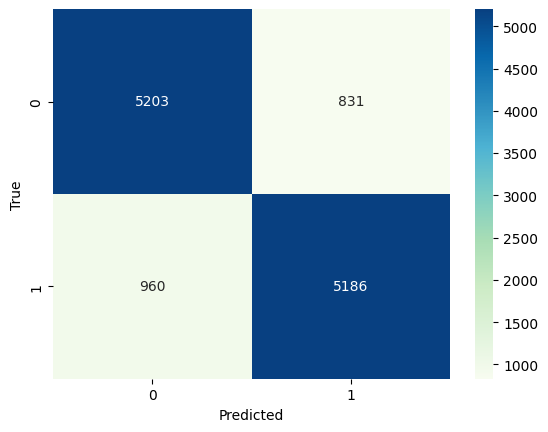

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Podemos observar la distribución de la matriz de confusión, lo que nos lleva a pensar que el rendimiento de nuestro programa, especialmente en términos del F1-Score, parece ser sólido. Sin embargo, es crucial validar estas conclusiones en Kaggle para obtener una evaluación más amplia y objetiva del rendimiento de nuestro modelo.

Realicemos la predicción sobre el dataset de test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names


0    13593
1    12942
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_rf1.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Este primer modelo ha obtenido una puntuación de 0.82639 en la competencia de Kaggle.


#### Segundo Modelo Random Forest(0.82878)

En este caso,variamos el valor de los estimadores ,min_simple_split y min_simple_leaf para probar comon afecta al modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier


#Creamos un clasificador con hiperparámetros arbitrarios
rfc = RandomForestClassifier(random_state=2,
                             n_jobs=-1,
                             criterion="entropy",
                             min_samples_leaf=10,
                             min_samples_split=15,
                             n_estimators= 1000 )
#Entrenamos el modelo
model = rfc.fit(X = x_train, y = y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


##### Prediccion sobre el dataset test

In [ ]:

#Predicción con mejor estimador
y_pred=model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.8561103810775295

A simple vista,por el valor obtenido en el f1,pareciera ser un mejor modelo

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,test,pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Text(50.722222222222214, 0.5, 'True')

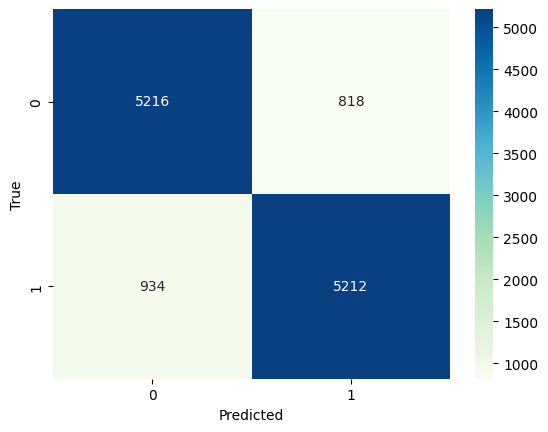

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names


0    13663
1    12872
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_rf2.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


#### Tercer modelo  Random Forest(0.82978)

En este caso,variamos el valor de los estimadores y min_simple_split  para probar como afecta al modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier


#Creamos un clasificador con hiperparámetros arbitrarios
rfc = RandomForestClassifier(max_features='auto',
                             oob_score=True,
                             random_state=2,
                             n_jobs=-1,
                             criterion="entropy",
                             min_samples_leaf=10,
                             min_samples_split=18,
                             n_estimators= 3000 )
#Entrenamos el modelo
model = rfc.fit(X = x_train, y = y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


##### Prediccion sobre el dataset test

In [ ]:

#Predicción con mejor estimador
y_pred=model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.8561328510358435

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,test,pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Text(50.722222222222214, 0.5, 'True')

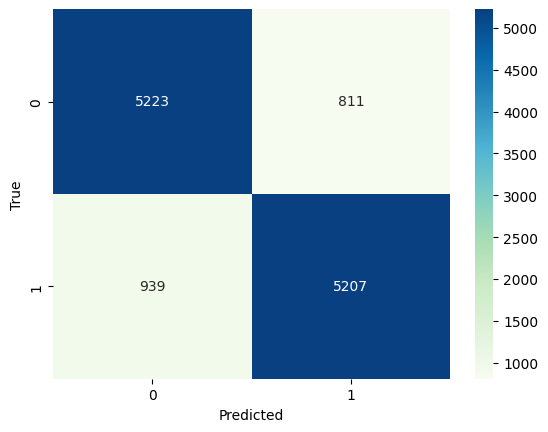

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names


0    13680
1    12855
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_rf3.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


### D) Clasificador XGBOOST


XGBoost, que significa "Extreme Gradient Boosting", es una potente técnica de aprendizaje automático que ha ganado una inmensa popularidad en la comunidad de ciencia de datos y aprendizaje automático en los últimos años. Se basa en el algoritmo de Gradient Boosting y es conocido por su capacidad para generar modelos altamente precisos en una variedad de tareas de clasificación y regresión. XGBoost combina eficazmente múltiples árboles de decisión para crear un modelo conjunto robusto y optimizado.

XGBoost está relacionado con el concepto de "Boosting". Boosting se refiere a una familia de algoritmos de aprendizaje automático que combinan múltiples modelos base más débiles (por ejemplo, árboles de decisión simples) en un modelo fuerte y más preciso. El objetivo es corregir los errores de los modelos base anteriores al dar más peso a las instancias clasificadas incorrectamente.

**Hiper-parámetros**

* learning_rate: tasa de aprendizaje
+ max_depth: máxima profundidad de cada árbol
* subsample: porcentaje de muestras usadas para cada árbol (valor muy bajo, posible underfitting)
* colsample_bytree: porcentaje de features usadas para cada árbol (valores muy alto, posible overfitting)
* n_estimators: cantidad de árboles a construir.

**Parámetros de regularización:**

* **gamma**: umbral para hacer split basado en la reducción de error de hacer el nuevo split.
* **alpha**: regularización para los pesos de las hojas. Un valor más alto genera una mayor regularización.
* **lambda**: similar alpha pero para la sintonia fina.

####Primer Modelo de XGBOOST (0.77095)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


xgb_params = {
    'n_estimators': [50],
    'learning_rate': np.range(0.01, 0.2),
    'max_depth': np.range(3, 7),
    'subsample': np.range(0.8, 1.0),
    'colsample_bytree': np.range(0.8, 1.0),
    'gamma': np.range(0.0, 0.2),
    'alpha': np.range(0.0, 0.2),
    'lambda': np.range(0.0, 0.2)
}


xgb_model = xgb.XGBClassifier()


grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)


best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mejores hiperparámetros: {'alpha': 0.1, 'colsample_bytree': 1.0, 'gamma': 0.1, 'lambda': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'random_state': -1, 'subsample': 0.8}


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.1, learning_rate=0.2,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None, ...)

##### Prediccion sobre del dataset test

In [ ]:
#Predicción con mejor estimador
y_pred=best_xgb_model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8553388522519995

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

,test,pred
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(50.722222222222214, 0.5, 'True')

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

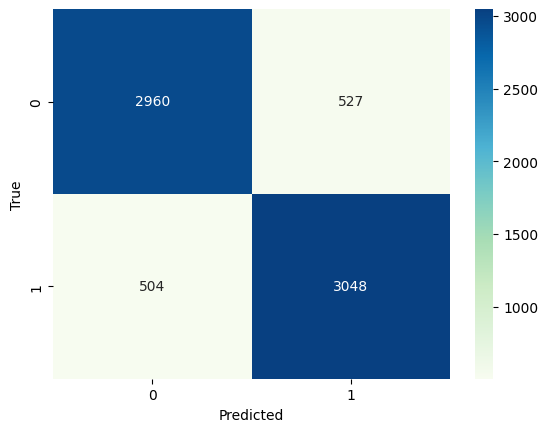

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = best_xgb_model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    15162
1    11373
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,0
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_xgboost1.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


#### Segundo modelo de XGBOOST(2)(0,79)

Dado el modelo anterior ,decido variar los valores de ciertos hiperparametros para ver como se comporta el modelo

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV




xgb_params = {
    'n_estimators': [200],
    'learning_rate': [0.2],
    'max_depth': [26],
    'subsample': [0.8],
    'colsample_bytree': [1.0],
    'gamma': [0.1],
    'alpha': [ 0.1],
    'lambda': [0.1]
}


xgb_model = xgb.XGBClassifier()


grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)


best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mejores hiperparámetros: {'alpha': 0.1, 'colsample_bytree': 1.0, 'gamma': 0.1, 'lambda': 0.1, 'learning_rate': 0.2, 'max_depth': 26, 'n_estimators': 200, 'random_state': -1, 'subsample': 0.8}


XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.1, learning_rate=0.2,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=26, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, ...)

##### Prediccion sobre del dataset test

In [ ]:

#Predicción con mejor estimador
y_pred=best_xgb_model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8669325303165948

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

,test,pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(50.722222222222214, 0.5, 'True')

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

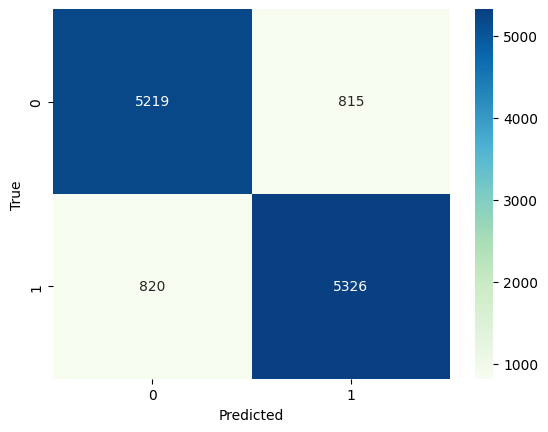

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = best_xgb_model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    14548
1    11987
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,0
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_xgboost2.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


#### Tercer modelo XGBOOST (0.80453)

Dado el modelo anterior ,decido variar los valores de ciertos hiperparametros para ver como se comporta el modelo

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV




xgb_params = {
    'random_state': [-1],
    'n_estimators': [185],
    'learning_rate': [0.2],
    'max_depth': [16],
    'subsample': [0.8],
    'colsample_bytree': [1.0],
    'gamma': [0.1],
    'alpha': [ 0.1],
    'lambda': [0.1]
}


xgb_model = xgb.XGBClassifier()


grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_



best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.1, learning_rate=0.2,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=185, n_jobs=None, ...)

###### Prediccion sobre el dataset test

In [ ]:

#Predicción con mejor estimador
y_pred=best_xgb_model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8707008436080468

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,test,pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(50.722222222222214, 0.5, 'True')

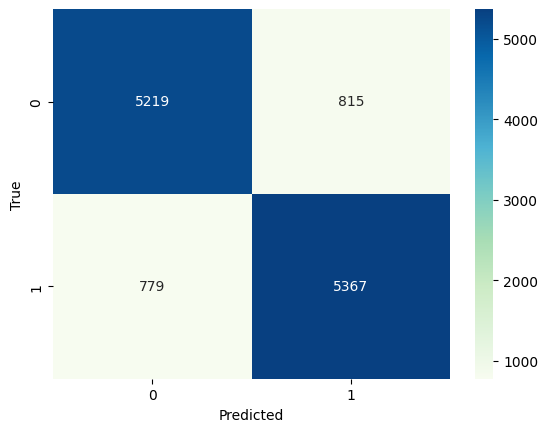

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = best_xgb_model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    14590
1    11945
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,0
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_xgboost4.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Cuarto modelo XGBOOST (0.77)

Dado el modelo anterior ,decidimos variar los features utilizados para ver como se comporta el modelo

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


# Definir los parámetros del modelo, incluyendo los de regularización
xgb_params = {

    'n_estimators': np.arange(10, 1000, 10),
    'learning_rate':np.arange(0.1, 1, 0.1),
    'max_depth':  np.arange(10, 30, 2),
    'subsample':  np.arange(0.1, 1, 0.1),
    'colsample_bytree':  np.arange(0.1, 1, 0.1),
    'gamma': np.arange(0.1, 1, 0.1),
    'alpha': np.arange(0.1, 1, 0.1),
    'lambda': np.arange(0.1, 1, 0.1)
}

# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier()

# Crea un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=xgb_params, n_iter=100, cv=10, scoring='f1', random_state=42)

# Ajusta el modelo con búsqueda aleatoria
random_search.fit(x_train, y_train)

# Encuentra los mejores hiperparámetros
best_params = random_search.best_params_

# Encuentra el mejor modelo
model = random_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
best_params

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'subsample': 0.9,
 'n_estimators': 490,
 'max_depth': 14,
 'learning_rate': 0.30000000000000004,
 'lambda': 0.6,
 'gamma': 0.1,
 'colsample_bytree': 0.6,
 'alpha': 0.6}

###### Prediccion sobre el dataset test

In [ ]:

#Predicción con mejor estimador
y_pred=model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8683910850821539

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,test,pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(50.722222222222214, 0.5, 'True')

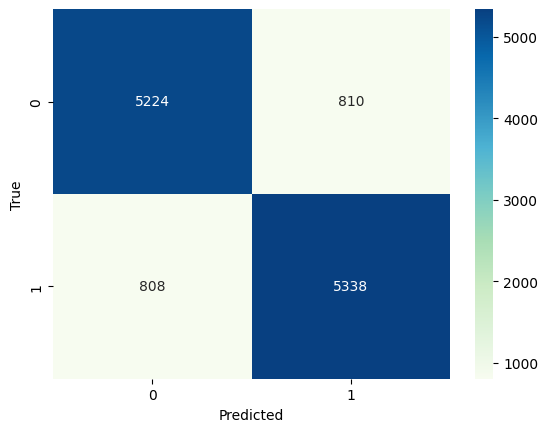

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    14456
1    12079
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_xgboost13.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### E) Ensambles híbridos

##### Ensamble híbrido del tipo Stacking(0.79677)

El stacking es una técnica de ensamblado avanzada en el aprendizaje automático que se utiliza para combinar las predicciones de múltiples modelos en un nivel superior llamado "meta-modelo". A diferencia de la votación, donde los modelos base emiten predicciones y se realiza una elección mayoritaria o ponderada, en el stacking, se entrena otro modelo (el meta-modelo) para aprender a combinar las predicciones de los modelos base.

Utilizo los mejores modelos obtenidos en nuestro trabajo

In [ ]:
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

#Modelos Base
base_models = [('random_forest', RandomForestClassifier
                             (random_state=2,
                             n_jobs=-1,
                             criterion="entropy",
                             min_samples_leaf=10,
                             min_samples_split=18,
                             n_estimators= 3000 )),
               ('svm',SVC()),
               ('knn', KNeighborsClassifier(n_neighbors=33,
                                            weights='distance',
                                            metric='manhattan',
                                            algorithm='kd_tree'))]


meta_model = xgb.XGBClassifier(random_state=-1, n_estimators=185, learning_rate=0.2, max_depth=16, subsample=0.8, colsample_bytree=1.0, gamma=0.1, alpha=0.1, reg_lambda=0.1)

#Ensemble Stacking
stacking_model = StackingClassifier(estimators=base_models,
                                    final_estimator=meta_model,
                                    passthrough=True,
                                    cv=5,
                                    verbose=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Evaluo en conjunto de test

stacking_model.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


StackingClassifier(cv=5,
                   estimators=[('random_forest',
                                RandomForestClassifier(criterion='entropy',
                                                       min_samples_leaf=10,
                                                       min_samples_split=18,
                                                       n_estimators=3000,
                                                       n_jobs=-1,
                                                       random_state=2)),
                               ('svm', SVC()),
                               ('knn',
                                KNeighborsClassifier(algorithm='kd_tree',
                                                     metric='manhattan',
                                                     n_neighbors=33,
                                                     weights='distance'))],
                   final_estimator=XGBClassifier(alpha=0.1, base_score...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.2,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=16, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=185, n_jobs=None,
                                                 num_parallel_tree=None, ...),
                   passthrough=True, verbose=2)

###### Prediccion sobre del dataset test

In [ ]:
#Predicción con mejor estimador
y_pred=stacking_model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8522875816993464

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,test,pred
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(50.722222222222214, 0.5, 'True')

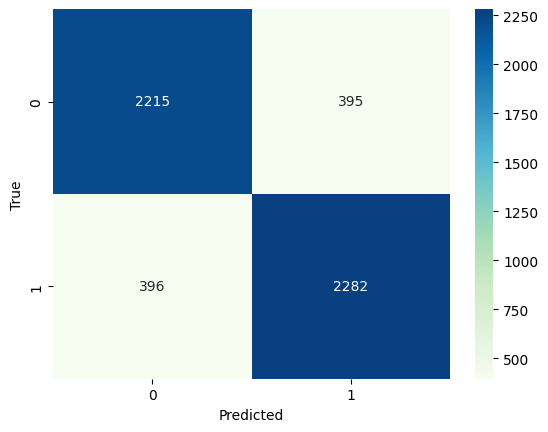

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = stacking_model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

ds_resultados['is_canceled'] = ds_resultados['is_canceled'].astype(int)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,0
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_stacking2.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Ensamble híbrido del tipo Voting(0.82055)

La idea principal detrás del método de votación es que, al combinar múltiples modelos, es más probable que se obtenga una predicción precisa, ya que los errores individuales de cada modelo tienden a compensarse entre sí.
El método de votación es especialmente útil cuando se utilizan diversos tipos de modelos o algoritmos, ya que cada uno puede capturar diferentes aspectos de los datos o tener fortalezas en diferentes áreas. Al combinar sus predicciones, se puede lograr un rendimiento general mejorado.

In [ ]:
from sklearn.ensemble import VotingClassifier

#Creo clasificadores

xgb_clf = xgb.XGBClassifier(random_state=-1, n_estimators=185, learning_rate=0.2, max_depth=16, subsample=0.8, colsample_bytree=1.0, gamma=0.1, alpha=0.1, reg_lambda=0.1)
rnd_clf = KNeighborsClassifier(n_neighbors=33,weights='distance',metric='manhattan',algorithm='kd_tree')
knn_clf = RandomForestClassifier(random_state=2,n_jobs=-1,criterion="entropy",min_samples_leaf=10,min_samples_split=18,n_estimators= 3000 )

#Creo ensemble de Votación
vot_clf = VotingClassifier(estimators = [('xgb', xgb_clf), ('rnd', rnd_clf), ('knn', knn_clf)], voting = 'hard')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vot_clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(alpha=0.1, base_score=None,
                                            booster=None, callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1.0, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0.1,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            lea...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=185, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('rnd',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   metric='manhattan',
                                                   n_neighbors=33,
                                                   weights='distance')),
                             ('knn',
                              RandomForestClassifier(criterion='entropy',
                                                     min_samples_leaf=10,
                                                     min_samples_split=18,
                                                     n_estimators=3000,
                                                     n_jobs=-1,
                                                     random_state=2))])

###### Prediccion sobre del dataset test

In [ ]:
#Predicción con mejor estimador
y_pred=vot_clf.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8579470820041284

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,test,pred
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(50.722222222222214, 0.5, 'True')

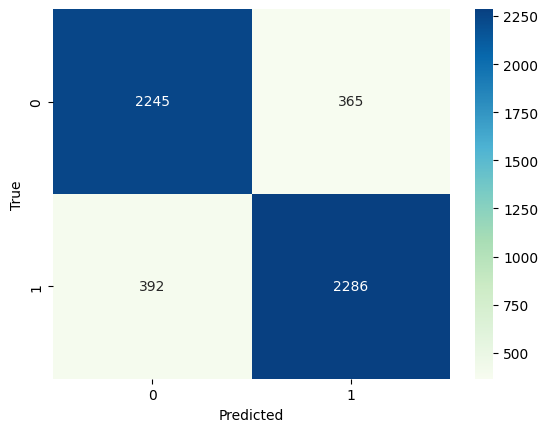

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = vot_clf.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

ds_resultados['is_canceled'] = ds_resultados['is_canceled'].astype(int)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_voting1.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




---
###F) Evaluación de performances en entrenamiento y validación


#### Random Forest

El modelo con la mayor valoración obtenida fue un Random Forest, el cual demostró un rendimiento sobresaliente con una puntuación de 0.82978.

Evaluar el rendimiento de un modelo es un paso fundamental en el proceso de aprendizaje automático, ya que nos permite determinar cuán efectivo es en la tarea asignada. En este contexto, exploraremos el desempeño del modelo tanto en el conjunto de entrenamiento como en el de validación, utilizando diversas métricas, entre las cuales destaca una herramienta esencial: la matriz de confusión.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


#Creamos un clasificador con hiperparámetros arbitrarios
rfc = RandomForestClassifier(max_features='auto',
                             oob_score=True,
                             random_state=2,
                             n_jobs=-1,
                             criterion="entropy",
                             min_samples_leaf=10,
                             min_samples_split=18,
                             n_estimators= 3000 )
#Entrenamos el modelo
model = rfc.fit(X = x_train, y = y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportW

##### Evaluación de performance en entrenamiento

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     17481
         1.0       0.90      0.87      0.88     17675

    accuracy                           0.89     35156
   macro avg       0.89      0.89      0.89     35156
weighted avg       0.89      0.89      0.89     35156

F1-Score: 0.8849918199822049


Text(50.722222222222214, 0.5, 'True')

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

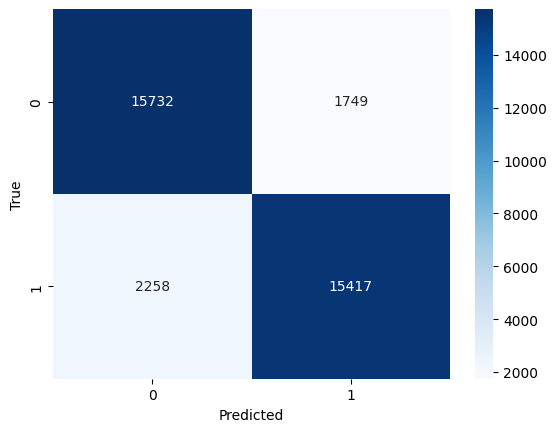

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred = model.predict(x_train)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_train,y_pred))
print('F1-Score: {}'.format(f1_score(y_train, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_train,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.8860223006030266
Recall: 0.8722489391796322
F1 Score: 0.8849918199822049
Precision: 0.8981125480601189


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*   Accuracy : 0.8860

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 88,60%.

*   Recall : 0.8722

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 87.22% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.884991

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.884991, lo que indica un muy buen equilibrio entre accuracy y recall.

*  Precision (Precisión): 0.89811

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de 0.89811 significa que el 89.81% de las predicciones positivas realizadas por el modelo son verdaderas.

##### Evaluación de performance en validación

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      4371
         1.0       0.86      0.83      0.84      4419

    accuracy                           0.84      8790
   macro avg       0.84      0.84      0.84      8790
weighted avg       0.84      0.84      0.84      8790

F1-Score: 0.8417531718569781


Text(50.722222222222214, 0.5, 'True')

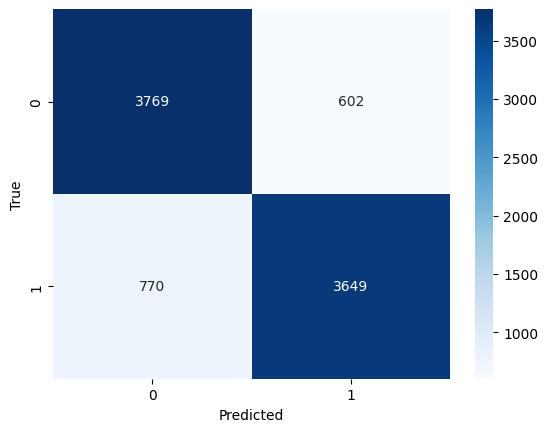

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred= model.predict(x_test)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.8439135381114903
Recall: 0.8257524326770762
F1 Score: 0.8417531718569781
Precision: 0.8583862620559868


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*   Accuracy : 0.843

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 84,30%.

*   Recall : 0.825

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 82.52% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.841753

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.841753, lo que indica un  buen equilibrio entre accuracy y recall.

*  Precision (Precisión): 0.858362

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de 0.89811 significa que el 83.83% de las predicciones positivas realizadas por el modelo son verdaderas.

Podemos notar la gran difrencia que hay en la performance entre en la metrica f1,que es la interesentantem del analisis,de alredor de 0,04 puntos de difencia

#### Ensamble híbrido tipo Voting

El siguiente en el ranking de valoracion fue un ensamble Voting, el cual demostró un rendimiento  con una puntuación de 0.82005.

Evaluar el rendimiento de un modelo es un paso fundamental en el proceso de aprendizaje automático, ya que nos permite determinar cuán efectivo es en la tarea asignada. En este contexto, exploraremos el desempeño del modelo tanto en el conjunto de entrenamiento como en el de validación, utilizando diversas métricas, entre las cuales destaca una herramienta esencial: la matriz de confusión.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier

#Creo clasificadores

xgb_clf = xgb.XGBClassifier(random_state=-1, n_estimators=185, learning_rate=0.2, max_depth=16, subsample=0.8, colsample_bytree=1.0, gamma=0.1, alpha=0.1, reg_lambda=0.1)
rnd_clf = KNeighborsClassifier(n_neighbors=33,weights='distance',metric='manhattan',algorithm='kd_tree')
knn_clf = RandomForestClassifier(random_state=2,n_jobs=-1,criterion="entropy",min_samples_leaf=10,min_samples_split=18,n_estimators= 3000 )

#Creo ensemble de Votación
vot_clf = VotingClassifier(estimators = [('xgb', xgb_clf), ('rnd', rnd_clf), ('knn', knn_clf)], voting = 'hard')
model = vot_clf.fit(X = x_train, y = y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

##### Evaluación de performance en entrenamiento

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17481
         1.0       1.00      1.00      1.00     17675

    accuracy                           1.00     35156
   macro avg       1.00      1.00      1.00     35156
weighted avg       1.00      1.00      1.00     35156

F1-Score: 0.9963506747008403


Text(50.722222222222214, 0.5, 'True')

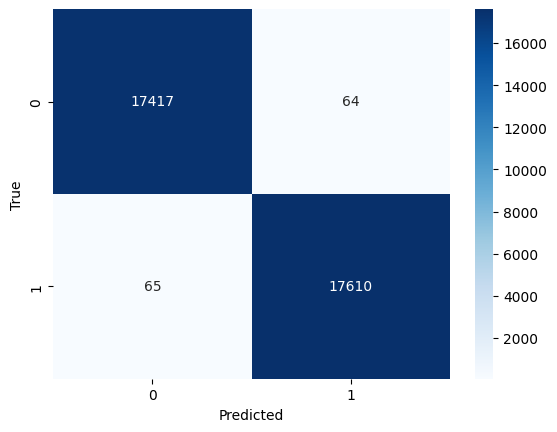

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred = model.predict(x_train)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_train,y_pred))
print('F1-Score: {}'.format(f1_score(y_train, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_train,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.9963306405734441
Recall: 0.9963224893917964
F1 Score: 0.9963506747008403
Precision: 0.996378861604617


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*   Accuracy : 0.99633

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 99,63%.

*   Recall : 0.99632

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 99.63% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.99635

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.99635, lo que indica un excelente equilibrio entre accuracy y recall.

*  Precision (Precisión): 0.99637

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de 0.99637 significa que el 99.63% de las predicciones positivas realizadas por el modelo son verdaderas.

A simple vista ,podemos notra con los valores que obtuvimos frente al conjunto de datos determinado,que el modelo funciona de manera excelente,pero veamos como se comporta con otros conjuntos de datos

##### Evaluación de performance en validación

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      4371
         1.0       0.87      0.84      0.85      4419

    accuracy                           0.85      8790
   macro avg       0.85      0.85      0.85      8790
weighted avg       0.85      0.85      0.85      8790

F1-Score: 0.8531773342509749


Text(50.722222222222214, 0.5, 'True')

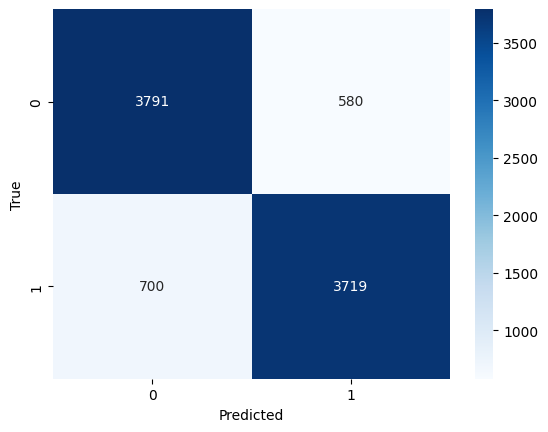

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred= model.predict(x_test)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.8543799772468714
Recall: 0.8415931206155238
F1 Score: 0.8531773342509749
Precision: 0.8650849034659223


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*   Accuracy : 0.8543

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 85,43%.

*   Recall : 0.8414

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 84.15% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.8531

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.8531, lo que indica un  buen equilibrio entre accuracy y recall.

*  Precision (Precisión): 0.86508

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de 0.86508 significa que el 86,50% de las predicciones positivas realizadas por el modelo son verdaderas.

Podemos notra que el modelo en conjunto de de datos de entrenamiento fuenciona casi perfecto,pero al utilizar los valores de validacion,notamos una gran baja en su rndimiento,lo cual podemos ver como esta sobreajustandose al modelo de entrenamiento.

#### SVM con kernel Polinómico

El siguiente en el ranking de valoracion fue un modelo de SVM(Kernel del tipo polinomial), el cual demostró un rendimiento  con una puntuación de 0.80577.

Evaluar el rendimiento de un modelo es un paso fundamental en el proceso de aprendizaje automático, ya que nos permite determinar cuán efectivo es en la tarea asignada. En este contexto, exploraremos el desempeño del modelo tanto en el conjunto de entrenamiento como en el de validación, utilizando diversas métricas, entre las cuales destaca una herramienta esencial: la matriz de confusión.

##### Normalización de datos



In [ ]:
#Separo un set de Evaluacion
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_hoteles_train.drop([target], axis='columns', inplace=False)

ds_trabajo_x = ds_trabajo_x.dropna()

#Creo un dataset con la variable target
ds_trabajo_y = ds_hoteles_train[target].copy()
ds_trabajo_y = ds_trabajo_y.dropna()

x_train, x_test, y_train, y_test = train_test_split(ds_hoteles_train[features].values,
                                                    ds_hoteles_train[target].values,
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=ds_hoteles_train[target].values) #estratificado para mantener proporcion

#Armo una version escalada con minmax (media=0 , var=1  )
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax  = min_max_scaler.transform(x_test)

#Armo una version estandarizada
stand_scaler = preprocessing.StandardScaler()
x_train_norm = stand_scaler.fit_transform(x_train)
x_test_norm=stand_scaler.transform(x_test)

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48717
# Datos Prueba: 12180
% Positivos Entrenamiento: 50.459
% Positivos Prueba: 50.460


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### Evaluación de performance en entrenamiento

In [ ]:
from scipy.stats._levy_stable import uniform
from scipy import stats
from sklearn.svm import SVC


svm_poly = SVC(kernel = "poly", C = 11.486168673439304, gamma = 0.5416227006820964)

model = svm_poly.fit(x_train_minmax,y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Conseguimos de esta forma una normalización de datos para crear nuestros modelos. Ahora, optimicemos los hiperparámetros de los SVM para buscar obtener la mejor performance.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.83      0.85      0.84     24135
           1       0.85      0.83      0.84     24582

    accuracy                           0.84     48717
   macro avg       0.84      0.84      0.84     48717
weighted avg       0.84      0.84      0.84     48717

F1-Score: 0.8385578966919123


Text(50.722222222222214, 0.5, 'True')

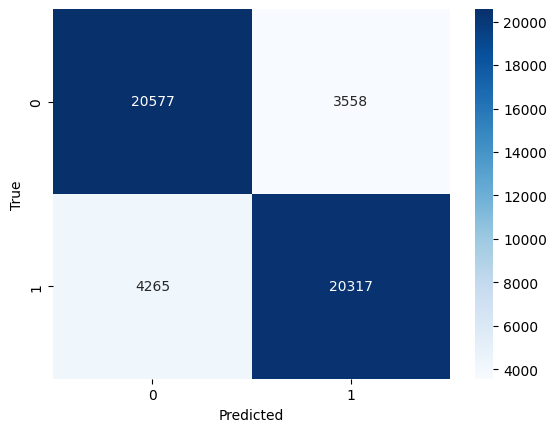

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred = model.predict(x_train_minmax)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_train,y_pred))
print('F1-Score: {}'.format(f1_score(y_train, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_train,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.8394195044850873
Recall: 0.8264990643560328
F1 Score: 0.8385578966919123
Precision: 0.8509738219895288


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*   Accuracy : 0.83941

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 83,94%.

*   Recall : 0.82649

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 82.64% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.83855

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.83855, lo que indica un excelente equilibrio entre accuracy y recall.

*  Precision (Precisión): 0.85097

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de 0.85097 significa que el 85.09% de las predicciones positivas realizadas por el modelo son verdaderas.

A simple vista ,podemos notra con los valores que obtuvimos frente al conjunto de datos determinado,que el modelo funciona de manera excelente,pero veamos como se comporta con otros conjuntos de datos

##### Evaluación de performance en validación

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.82      0.84      0.83      6034
           1       0.84      0.82      0.83      6146

    accuracy                           0.83     12180
   macro avg       0.83      0.83      0.83     12180
weighted avg       0.83      0.83      0.83     12180

F1-Score: 0.8308859924104934


Text(50.722222222222214, 0.5, 'True')

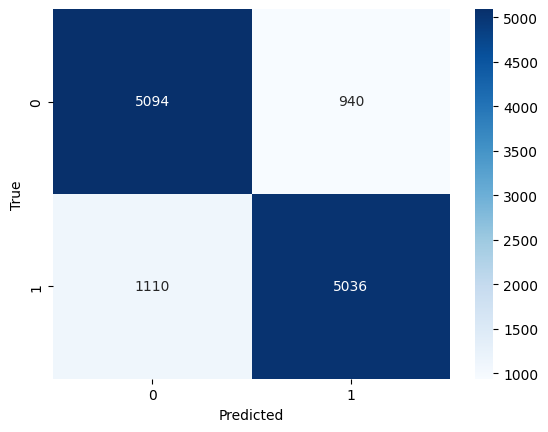

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred= model.predict(x_test_minmax)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.8316912972085386
Recall: 0.8193947282785552
F1 Score: 0.8308859924104934
Precision: 0.8427041499330656


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*   Accuracy : 0.8316

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 83,16%.

*   Recall : 0.8193

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 81.93% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.83088

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.83088, lo que indica un  buen equilibrio entre accuracy y recall.

*  Precision (Precisión): 0.8427

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de 0.8427 significa que el 84,27% de las predicciones positivas realizadas por el modelo son verdaderas.

Podemos notra que el modelo en conjunto de de datos de entrenamiento fuenciona casi perfecto,pero al utilizar los valores de validacion,notamos una gran baja en su rndimiento,lo cual podemos ver como esta sobreajustandose al modelo de entrenamiento.

#### XGBOOST

El siguiente en el ranking de valoracion fue un modelo de XGBoost, el cual demostró un rendimiento  con una puntuación de 0.80453.

Evaluar el rendimiento de un modelo es un paso fundamental en el proceso de aprendizaje automático, ya que nos permite determinar cuán efectivo es en la tarea asignada. En este contexto, exploraremos el desempeño del modelo tanto en el conjunto de entrenamiento como en el de validación, utilizando diversas métricas, entre las cuales destaca una herramienta esencial: la matriz de confusión.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV



# Definir los parámetros del modelo, incluyendo los de regularización
xgb_params = {
    'random_state': [-1],  # Puedes probar diferentes valores
    'n_estimators': [185],  # Puedes probar diferentes números de estimadores
    'learning_rate': [0.2],  # Puedes probar diferentes tasas de aprendizaje
    'max_depth': [16],  # Puedes probar diferentes profundidades máximas
    'subsample': [0.8],  # Puedes probar diferentes valores de subsample
    'colsample_bytree': [1.0],  # Puedes probar diferentes valores de colsample_bytree
    'gamma': [0.1],  # Puedes probar diferentes valores de gamma
    'alpha': [ 0.1],  # Puedes probar diferentes valores de alpha
    'lambda': [0.1]  # Puedes probar diferentes valores de lambda
}

# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier()

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)

# Mostrar los mejores hiperparámetros
best_params = grid_search.best_params_


# Entrenar el modelo con los mejores hiperparámetros
model = xgb.XGBClassifier(**best_params)
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.1, learning_rate=0.2,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=185, n_jobs=None, ...)

##### Evaluación de performance en entrenamiento

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24135
           1       1.00      1.00      1.00     24582

    accuracy                           1.00     48717
   macro avg       1.00      1.00      1.00     48717
weighted avg       1.00      1.00      1.00     48717

F1-Score: 0.9960752414844941


Text(50.722222222222214, 0.5, 'True')

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

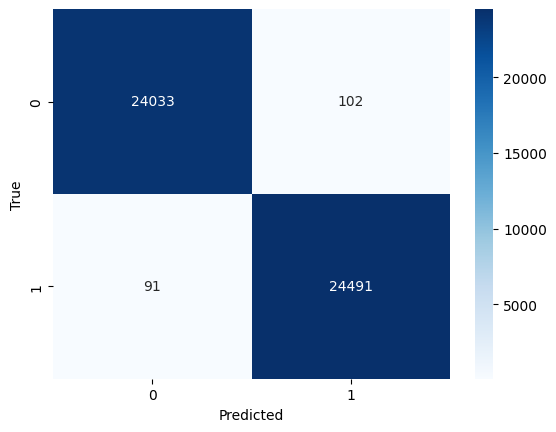

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred = model.predict(x_train)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_train,y_pred))
print('F1-Score: {}'.format(f1_score(y_train, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_train,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.9960383439045918
Recall: 0.9962981043039623
F1 Score: 0.9960752414844941
Precision: 0.9958524783474972


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*   Accuracy : 0.99603

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 99,60%.

*   Recall : 0.9962

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 99.62% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.99607

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.99607, lo que indica un excelente equilibrio entre accuracy y recall.

*  Precision (Precisión): 0.99585

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de 0.99585 significa que el 99.58% de las predicciones positivas realizadas por el modelo son verdaderas.

A simple vista ,podemos notra con los valores que obtuvimos frente al conjunto de datos determinado,que el modelo funciona de manera excelente,pero veamos como se comporta con otros conjuntos de datos

##### Evaluación de performance en validación

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.87      0.86      0.87      6034
           1       0.87      0.87      0.87      6146

    accuracy                           0.87     12180
   macro avg       0.87      0.87      0.87     12180
weighted avg       0.87      0.87      0.87     12180

F1-Score: 0.8707008436080468


Text(50.722222222222214, 0.5, 'True')

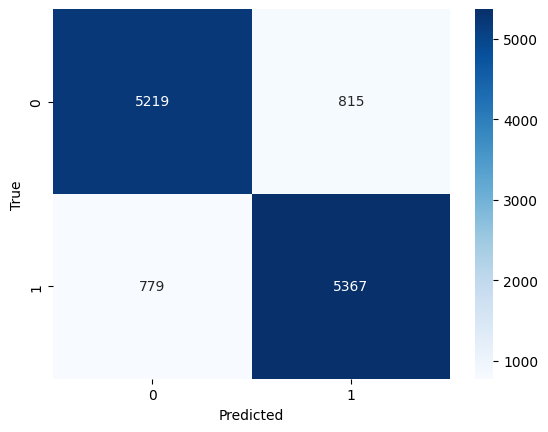

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred= model.predict(x_test)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.8691297208538588
Recall: 0.8732508948909861
F1 Score: 0.8707008436080468
Precision: 0.8681656421869945


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*   Accuracy : 0.8691

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 86,91%.

*   Recall : 0.87325

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 87.32% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.87070

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.87070, lo que indica un  buen equilibrio entre accuracy y recall.

*  Precision (Precisión): 0.86816

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de 0.86816 significa que el 86,81% de las predicciones positivas realizadas por el modelo son verdaderas.

Podemos notar que el modelo en conjunto de de datos de entrenamiento fuenciona casi perfecto,pero al utilizar los valores de validacion,notamos una gran baja en su rndimiento,lo cual podemos ver como esta sobreajustandose al modelo de entrenamiento.

#### Ensamble híbrido tipo Stacking

El siguiente en el ranking de valoracion fue un ensable de tipo Stacking, el cual demostró un rendimiento  con una puntuación de 0.79677.

Evaluar el rendimiento de un modelo es un paso fundamental en el proceso de aprendizaje automático, ya que nos permite determinar cuán efectivo es en la tarea asignada. En este contexto, exploraremos el desempeño del modelo tanto en el conjunto de entrenamiento como en el de validación, utilizando diversas métricas, entre las cuales destaca una herramienta esencial: la matriz de confusión.

In [ ]:
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

#Modelos Base
base_models = [('random_forest', RandomForestClassifier
                             (random_state=2,
                             n_jobs=-1,
                             criterion="entropy",
                             min_samples_leaf=10,
                             min_samples_split=18,
                             n_estimators= 3000 )),
               ('svm',SVC()),
               ('knn', KNeighborsClassifier(n_neighbors=33,
                                            weights='distance',
                                            metric='manhattan',
                                            algorithm='kd_tree'))]


meta_model = xgb.XGBClassifier(random_state=-1, n_estimators=185, learning_rate=0.2, max_depth=16, subsample=0.8, colsample_bytree=1.0, gamma=0.1, alpha=0.1, reg_lambda=0.1)

#Ensemble Stacking
stacking_model = StackingClassifier(estimators=base_models,
                                    final_estimator=meta_model,
                                    passthrough=True,
                                    cv=5,
                                    verbose=2)

model = stacking_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

##### Evaluación de performance en entrenamiento

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     24135
           1       1.00      0.99      0.99     24582

    accuracy                           0.99     48717
   macro avg       0.99      0.99      0.99     48717
weighted avg       0.99      0.99      0.99     48717

F1-Score: 0.9943392384443087


Text(50.722222222222214, 0.5, 'True')

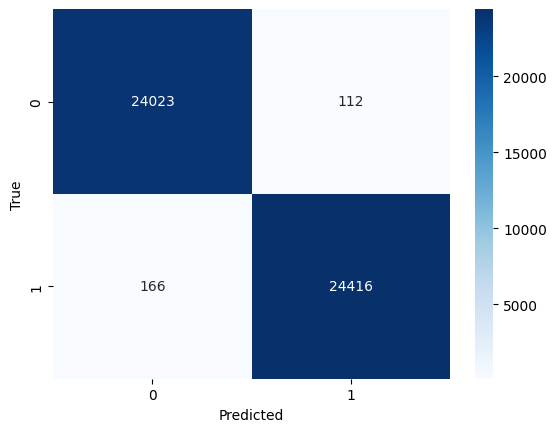

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred = model.predict(x_train)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_train,y_pred))
print('F1-Score: {}'.format(f1_score(y_train, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_train,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.9942935730853706
Recall: 0.9932470913676674
F1 Score: 0.9943392384443087
Precision: 0.9954337899543378


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*   Accuracy : 0.99429

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 99,42%.

*   Recall : 0.99324

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 99.32% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.994339

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.994339, lo que indica un excelente equilibrio entre accuracy y recall.

*  Precision (Precisión): 0.99543

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de 0.99543 significa que el 99.54% de las predicciones positivas realizadas por el modelo son verdaderas.

A simple vista ,podemos notar con los valores que obtuvimos frente al conjunto de datos determinado,que el modelo funciona de manera excelente,pero veamos como se comporta con otros conjuntos de datos

##### Evaluación de performance en validación

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      6034
           1       0.87      0.86      0.87      6146

    accuracy                           0.86     12180
   macro avg       0.86      0.86      0.86     12180
weighted avg       0.86      0.86      0.86     12180

F1-Score: 0.8650716145833333


Text(50.722222222222214, 0.5, 'True')

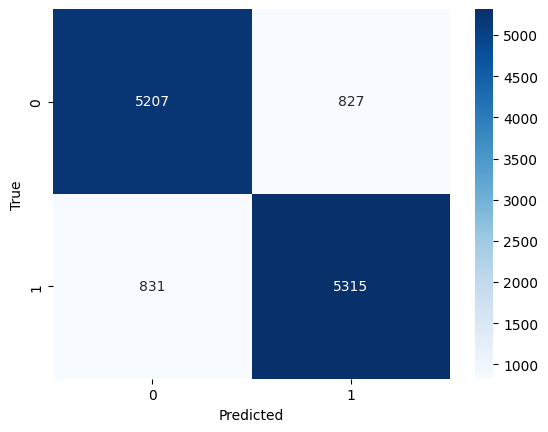

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred= model.predict(x_test)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.8638752052545156
Recall: 0.8647901073869183
F1 Score: 0.8650716145833333
Precision: 0.8653533051123412


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*   Accuracy : 0.8638

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 86,38%.

*   Recall : 0.86479

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 86,47% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.86507

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.86507, lo que indica un  buen equilibrio entre accuracy y recall.

*  Precision (Precisión): 0.8653

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de 0.8653 significa que el 86,53% de las predicciones positivas realizadas por el modelo son verdaderas.

Podemos notra que el modelo en conjunto de de datos de entrenamiento fuenciona casi perfecto,pero al utilizar los valores de validacion,notamos una gran baja en su rendimiento,lo cual podemos ver como esta sobreajustandose al modelo de entrenamiento.

#### KNN

El ultimo en el ranking de valoracion fue un modelo de KNN, el cual demostró un rendimiento  con una puntuación de 0.7428.

Evaluar el rendimiento de un modelo es un paso fundamental en el proceso de aprendizaje automático, ya que nos permite determinar cuán efectivo es en la tarea asignada. En este contexto, exploraremos el desempeño del modelo tanto en el conjunto de entrenamiento como en el de validación, utilizando diversas métricas, entre las cuales destaca una herramienta esencial: la matriz de confusión.

In [ ]:
rnd_clf = KNeighborsClassifier(n_neighbors=33,weights='distance',metric='manhattan',algorithm='kd_tree')

model = rnd_clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### Evaluación de performance en entrenamiento

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24135
           1       1.00      1.00      1.00     24582

    accuracy                           1.00     48717
   macro avg       1.00      1.00      1.00     48717
weighted avg       1.00      1.00      1.00     48717

F1-Score: 0.9961528283835772


Text(50.722222222222214, 0.5, 'True')

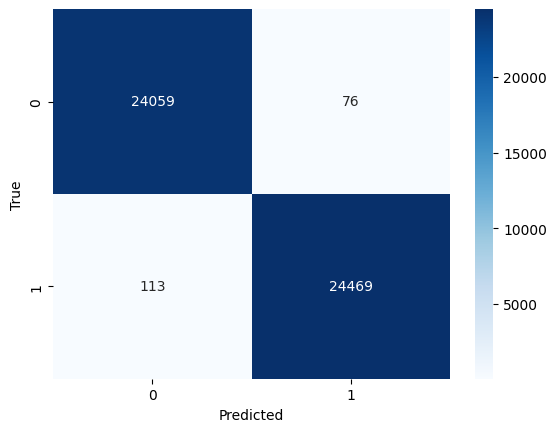

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred = model.predict(x_train)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_train,y_pred))
print('F1-Score: {}'.format(f1_score(y_train, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_train,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.9961204507666728
Recall: 0.9954031405093158
F1 Score: 0.9961528283835772
Precision: 0.9969036463638216


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*   Accuracy : 0.99612

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 99,63%.

*   Recall : 0.9954

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 99.63% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.99635

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.99635, lo que indica un excelente equilibrio entre accuracy y recall.

*  Precision (Precisión):  0.99690

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de  0.99690 significa que el 99.6% de las predicciones positivas realizadas por el modelo son verdaderas.

A simple vista ,podemos notra con los valores que obtuvimos frente al conjunto de datos determinado,que el modelo funciona de manera excelente,pero veamos como se comporta con otros conjuntos de datos

##### Evaluación de performance en validación

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.79      0.76      0.78      6034
           1       0.77      0.81      0.79      6146

    accuracy                           0.78     12180
   macro avg       0.78      0.78      0.78     12180
weighted avg       0.78      0.78      0.78     12180

F1-Score: 0.7896161809205287


Text(50.722222222222214, 0.5, 'True')

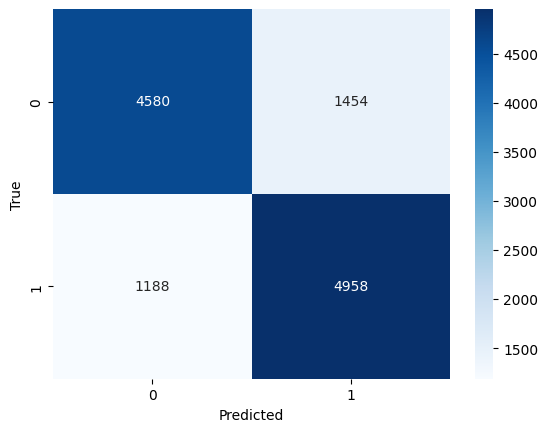

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred= model.predict(x_test)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.7830870279146142
Recall: 0.8067035470224536
F1 Score: 0.7896161809205287
Precision: 0.7732376793512165


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*   Accuracy : 0.7830

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 78,30%.

*   Recall : 0.80670

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 80.67% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.78961

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.78961, lo que indica un  buen equilibrio entre accuracy y recall.

*  Precision (Precisión): 0.77323

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de 0.77323 significa que el 77,32% de las predicciones positivas realizadas por el modelo son verdaderas.

Podemos notra que el modelo en conjunto de de datos de entrenamiento fuenciona casi perfecto,pero al utilizar los valores de validacion,notamos una gran baja en su rndimiento,lo cual podemos ver como esta sobreajustandose al modelo de entrenamiento.